# Dogs vs Cats

## Kaggle Dataset의 일부를 이용한 개, 고양이 구분

- One-hot encoding => Logistic Regression
- Data shuffling

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path = 'dogs_cats/train/'

In [5]:
path_t = 'dogs_cats/test/'

In [6]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [7]:
dogs_t, cats_t = [], []
y_dogs_t, y_cats_t = [], []

In [8]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [9]:
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [10]:
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [11]:
dog_path_t = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs_t.append(dog)

In [12]:
cat_path_t = os.path.join(path, 'cat.12*')
for dog_img in glob(dog_path_t):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    cats_t.append(dog)

In [13]:
classes = ['dog', 'cat']

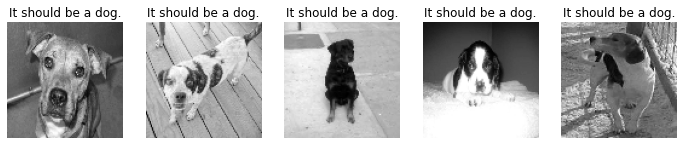

In [14]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

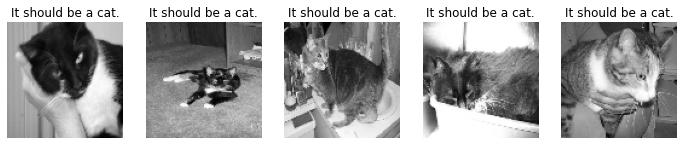

In [15]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [16]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [17]:
y_dogs_t = [1 for item in enumerate(dogs_t)]
y_cats_t = [0 for item in enumerate(cats_t)]

In [18]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [19]:
dogs_t = np.asarray(dogs_t).astype('float32') / 255
cats_t = np.asarray(cats_t).astype('float32') / 255
y_dogs_t = np.asarray(y_dogs_t).astype('int32')
y_cats_t = np.asarray(y_cats_t).astype('int32')

In [20]:
X_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [21]:
X_test = np.concatenate((dogs_t,cats_t), axis=0)
y_test = np.concatenate((y_dogs_t, y_cats_t), axis=0)

In [22]:
# len(X)

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

## Logistic 회귀

In [31]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(),
              metrics=['accuracy'])

In [38]:
modelpath = "model/dogs_vs_cats-cnn2-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [39]:
# y_train.reshape(-1, 1)

In [40]:
X_train.shape, y_train.shape

((2222, 96, 96, 1), (2222,))

In [42]:
model.fit(X_train, y_train, batch_size=32, epochs = 40, validation_split=0.2,
          callbacks=[checkpointer, early_stopping_callback])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1777/1777 [==============================] - 32s 18ms/step - loss: 0.7205 - accuracy: 0.6156 - val_loss: 0.9320 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.93204, saving model to model/dogs_vs_cats-cnn2-01-0.9320.hdf5
Epoch 2/40
1777/1777 [==============================] - 31s 18ms/step - loss: 0.6597 - accuracy: 0.6235 - val_loss: 0.7930 - val_accuracy: 0.0067

Epoch 00002: val_loss improved from 0.93204 to 0.79299, saving model to model/dogs_vs_cats-cnn2-02-0.7930.hdf5
Epoch 3/40
1777/1777 [==============================] - 31s 18ms/step - loss: 0.6558 - accuracy: 0.6258 - val_loss: 0.8320 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.79299
Epoch 4/40
1777/1777 [==============================] - 31s 18ms/step - loss: 0.6503 - accuracy: 0.6269 - val_loss: 0.9764 - val_accuracy: 0.0022

Epoch 00004: val_loss did not improve from 0.79299
Epoch 5/40
1777/1777 [===============

## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [23]:
model.predict()

NameError: name 'dfasdf' is not defined

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [ ]:
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
dfasdf

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2,
          callbacks=[checkpointer, early_stopping_callback])

In [ ]:
from tensorflow.keras.models import load_model
# del model
model = load_model('model/dogs_vs_cats-cnn-05-0.7555.hdf5')

In [ ]:
X_test.shape, y_test.shape

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])